# Dog Cat classification using 3layered network (Tensorflow)

In this project, we have trained a cat vs. dog classifier model using 2 hidden layer and 1 output layer. The output layer has two neuron units which gives one-hot vector output. If the output is $\begin{bmatrix}1\\ 0\end{bmatrix}$ meansthe corresponding image is labeled as cat and if it is $\begin{bmatrix}0\\ 1\end{bmatrix}$ means it is dog.

We first took 10,000 images of cat and 10,000 images of dog and shuffled them. After shuffling, kept 17,000 images for training and 3,000 images for testing the model.

**Our model functions as follows:**
<div style="background:#F7F7F7;width:600px;margin-left:200px">

![](https://latex.codecogs.com/gif.latex?%24%24Z%5E%7B%5B1%5D%7D%20%3D%20W%5E%7B%5B1%5D%7DX%20&plus;%20b%5E%7B%5B1%5D%7D%20%5C%5C%20A%5E%7B%5B1%5D%7D%20%3D%20g%5E%7B%5B1%5D%7D%28Z%5E%7B%5B1%5D%7D%29%20%5C%5C%20Z%5E%7B%5B2%5D%7D%20%3D%20W%5E%7B%5B2%5D%7DA%5E%7B%5B1%5D%7D%20&plus;%20b%5E%7B%5B2%5D%7D%20%5C%5C%20A%5E%7B%5B2%5D%7D%20%3D%20g%5E%7B%5B2%5D%7D%28Z%5E%7B%5B2%5D%7D%29%20%5C%5C%20Z%5E%7B%5B3%5D%7D%20%3D%20W%5E%7B%5B3%5D%7DA%5E%7B%5B2%5D%7D%20&plus;%20b%5E%7B%5B3%5D%7D%20%5C%5C%20A%5E%7B%5B3%5D%7D%20%3D%20g%5E%7B%5B3%5D%7D%28Z%5E%7B%5B3%5D%7D%29%24%24)
    
</div>

Where, ![](https://latex.codecogs.com/gif.latex?%24%20X.shape%20%3D%20%28n_x%2C%20m%29%2C%20%5C%5C%20W%5E%7B%5B1%5D%7D.shape%20%3D%20%2825%2C%20n_x%29%2C%20%5C%5C%20b%5E%7B%5B1%5D%7D.shape%20%3D%20%2825%2C%201%29%2C%20%5C%5C%20W%5E%7B%5B2%5D%7D.shape%20%3D%20%2812%2C%2025%29%20%5C%5C%20b%5E%7B%5B2%5D%7D.shape%20%3D%20%2812%2C%201%29%20%5C%5C%20W%5E%7B%5B3%5D%7D.shape%20%3D%20%282%2C%2012%29%20%5C%5C%20b%5E%7B%5B3%5D%7D.shape%20%3D%20%282%2C%201%29.%20%24)

here $n_x$ is 17,000.

Also, the activation function used here $g^{[1]}$ and $g^{[2]}$ are relu. And the last function $g^{[3]}$ is the softmax.

$A^{[3]}$ is our final output which can also be said as $\hat{y}$. Hence our error is $L(y - \hat{y})$. Also, our loss function is $$Loss = -(ylog\hat{y} -(1-y)log(1 - \hat{y}))$$.

This is the function which we have to minimize. Now, Lets look at some code:

<b><i>Importing python libraries</i></b>

In [17]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

%matplotlib inline
np.random.seed(1)

***Preprocessing Step***

In [2]:
train_data = np.load('C:/Users/Rohit/Music/machine_learning_projects/cat_vs_noncat/train_data.npy')
labels = np.load('C:/Users/Rohit/Music/machine_learning_projects/cat_vs_noncat/labels.npy')
labels = np.array(labels).reshape((1, -1))

In [3]:
print(train_data.shape)
print(labels.shape)

(3072, 20000)
(1, 20000)


In [4]:
train_data = train_data/255

Took 17000 images for training examples and 3000 images for dev-test. All the images are labelled as weither cat or dog because it is supervised learning.


<b><i>Hidden layers with units </i></b>

<img src = "./images/fig3.png" style="height:300px;width:400;">

In [5]:
X = train_data[:,:17000]
Y = labels[:,:17000]
X_test = train_data[:, 17000:]
Y_test = labels[:, 17000:]
print(Y.shape)

(1, 17000)


In [6]:
Y = convert_to_one_hot(Y, 2)
Y_test = convert_to_one_hot(Y_test, 2)
print(Y.shape)
print(X_test.shape)

(2, 17000)
(3072, 3000)


During training we have used Adam Optimizer to speed up our gradient training and also initialized the weights with Xavier Initializer method in the beginning of our training.

When we completed with our training we get the weights which gave 99.42% training accuracy. But out model performed badly on test data with an accuracy of just 59.76%. The model is overfitted with the training data. The model graphs are shown below:

***Before regularization***

<div class = "row"><img src = "./images/fig4.PNG" style="height:300px;width:300px">
    
So, to reduce high variance from the model few of the techniques are: increase the number of training images data which can be done either by adding some of the new clicked pics of dog-cat to the dataset or we can do data-augmentation on the available image data(i.e. generate image either by  croppping, flipping or rotating the image). We can also reduce the variance by regularization (either $L_1$ or $L_2$), dropout or by early stopping of model training.

So, we introduce $L_2$ regularization to the loss function and introduce dropout at the activation neurons with the keep_prob of 0.7. 
    
***After regularization***
<img src = "./images/fig5.PNG" style="height:300px;width:300px"></div>

**Model Development**

In [7]:
def create_placeholders(n_x, n_y):
    
    X = tf.placeholder(tf.float32, shape=(n_x, None), name = "X")
    Y = tf.placeholder(tf.float32, shape = (n_y, None), name = "Y")
    
    return X, Y

In [8]:
def initialize_parameters():
    
    tf.set_random_seed(1)
    
    W1 = tf.get_variable("W1", [25, 3072], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [12, 25], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b2 = tf.get_variable("b2", [12,1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [2, 12], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b3 = tf.get_variable("b3", [2,1], initializer = tf.zeros_initializer())

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [9]:
def forward_propagation(X, parameters):
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']

    Z1 = tf.add(tf.matmul(W1, X), b1)                                             # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                                           # A1 = relu(Z1)
    A1 = tf.layers.dropout(A1, rate=0.4, noise_shape=None, seed=None, training=False, name=None)
    Z2 = tf.add(tf.matmul(W2, A1), b2)                                             # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                                            # A2 = relu(Z2)
    A2 = tf.layers.dropout(A2, rate=0.4, noise_shape=None, seed=None, training=False, name=None)
    Z3 = tf.add(tf.matmul(W3, A2), b3)                                             # Z3 = np.dot(W3,Z2) + b3

    return Z3

In [10]:
def compute_cost(Z3, Y, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels) +
                          0.01*tf.nn.l2_loss(W1) + 0.01*tf.nn.l2_loss(W2) + 0.01*tf.nn.l2_loss(W3) + 0.01*tf.nn.l2_loss(b1) +
                          0.01*tf.nn.l2_loss(b1) + 0.01*tf.nn.l2_loss(b2) + 0.01*tf.nn.l2_loss(b3))
    
    return cost

**Model function combines all the above discussed function and does training of the model weights**

In [13]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 500, minibatch_size = 32, print_cost = True):
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of shape (n_x, n_y)
    X, Y = create_placeholders(n_x, n_y)
    
    # Initialize parameters
    parameters = initialize_parameters()
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    Z3 = forward_propagation(X, parameters)
    
    # Cost function: Add cost function to tensorflow graph
    cost = compute_cost(Z3, Y, parameters)
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.                                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size)             # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                
                epoch_cost += minibatch_cost / num_minibatches

            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

**Parameters returned after training are stored in the variable named "*parameters*"**

Cost after epoch 0: 0.946476
Cost after epoch 100: 0.471730
Cost after epoch 200: 0.440599
Cost after epoch 300: 0.421399
Cost after epoch 400: 0.414299


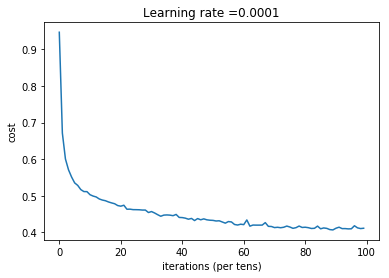

Parameters have been trained!
Train Accuracy: 0.92035294
Test Accuracy: 0.74666667


In [14]:
parameters = model(X, Y, X_test, Y_test)

**Output labelled dog-cat shown with their corresponding image**

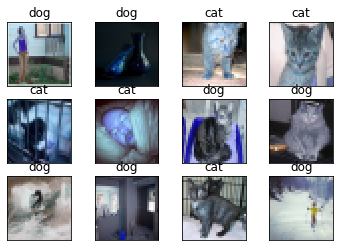

In [16]:
import scipy
from PIL import Image
from scipy import ndimage

my_image = X_test[:,5].reshape((-1,1))

fig=plt.figure()

for num,data in enumerate(X_test[:,:12].T):
    # cat: [1,0]
    # dog: [0,1]
    img_data = data.reshape(-1,1)
    
    y = fig.add_subplot(3,4,num+1)
    my_image_prediction = predict(img_data, parameters)
    
    img_data = img_data.reshape(32, 32, 3)
    y.imshow(img_data,cmap='gray')
    if str(np.squeeze(my_image_prediction)) == "1":
           str_label = "cat"
    else:
           str_label = "dog"
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()


Thereon, we get the total test accuracy of 74.67% which is an improvement over the previous test accuracy. That means we get an increment of 14.91% over test accuray after introducing regularization to the model architecture.

Even though the train accuracy is reduced from 99.42% to 92.03% because the regulaization increases the bias in the system and thus generalizing the model. But finally, we are concerned with the test accuracy, which got improved.